<a href="https://colab.research.google.com/github/Nydhal/Python-Notebooks/blob/master/FSL_CSE569_Project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
%matplotlib inline

Using TensorFlow backend.


# Project Part 2

In [0]:
# Preparing data to numpy
train = train_01.to_numpy()
test  = test_01.to_numpy()

# List of K neighbors 
k_list =[1, 3, 5, 7, 9, 11, 13, 15]

In [164]:
# Calculate NxM matrix of distances of N test points to M train points 
dist = []
for test_point in test.T[0:2].T:
    dist.append(np.hypot(*(train.T[0:2].T - test_point).T))

# Convert resulting list to numpy array
dist = np.array(dist)

# Print shape of the distance matrix
print(dist.shape)

(2115, 12665)

In [215]:
# For K = 1
k = 1
# Label predictions list
prediction = []


for i in range(len(dist)):
  prediction.append(\
                    float(\
                          # Get K closest points
                          np.take(train,\
                          # Get indices of smallest distance k elements 
                          np.argpartition(dist[i], k)[:k], axis=0)\
                          # Get Labels of K closest points
                          .T[2]\
                          # Calculate mean of the labels
                          .mean()\
                          # Convert to boolean (if the mean > 0.5 then #1 > #0)
                          > 0.5))

  
results = pd.DataFrame({'Label': test.T[2], 'Predict': prediction})

# Assign integer value 0,1 to correctness of prediction
results['Correct'] = np.where(results['Label']==results['Predict'], 1, 0)

# Mean of correct prediciotn is the accuracy
acc = results['Correct'].mean()

print('K: '+str(k)+'\tAccuracy: '+str(acc))  
results.describe()

K: 1	Accuracy: 0.9702127659574468


,Label,Predict,Correct
count,2115.000000,2115.000000,2115.000000
mean,0.536643,0.533333,0.970213
std,0.498773,0.499006,0.170040
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [0]:
#  Repeat Experiment for all K

accuracy_table = []
for k in k_list:
  prediction = []
  for i in range(len(dist)):
    prediction.append(float(np.take(train, np.argpartition(dist[i], k)[:k], axis=0).T[2].mean() > 0.5))

  KNN_results = pd.DataFrame({'True Label': test.T[2], 'Prediction': prediction})
  KNN_results['Correct'] = np.where(KNN_results['True Label']==KNN_results['Prediction'], 1, 0)

  acc = KNN_results['Correct'].mean()
  
  accuracy_table.append([k,acc])

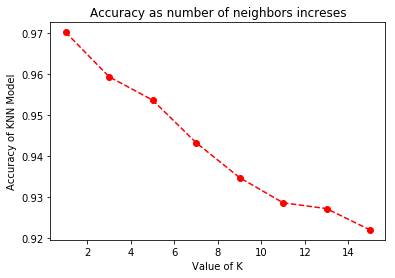

In [217]:
table = np.array(accuracy_table).T
plt.plot(table[0],table[1],'--ro')
plt.xlabel('Value of K')
plt.ylabel('Accuracy of KNN Model')
plt.title('Accuracy as number of neighbors increses')
plt.show()